<a href="https://colab.research.google.com/github/bhgtankita/DL_Colab/blob/master/Garbage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --header="Host: doc-04-54-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/0B3P9oO5A3RvSUW9qTG11Ul83TEE" --header="Cookie: AUTH_8i4qcj29pfugg26jaivfj1dsu40avhjo_nonce=ga23h7ldl0gbe" --header="Connection: keep-alive" "https://doc-04-54-docs.googleusercontent.com/docs/securesc/ohtcfprsa3vqsg41cl0o62sdpk302ip0/855f8drdm3atrf9sk8evrs12r5thklu9/1563638400000/02936877558474928743/01013830422934825035/0B3P9oO5A3RvSNWw5X0c5R1hJRnc?e=download&nonce=ga23h7ldl0gbe&user=01013830422934825035&hash=sjoekp98r9157q387942ckfdma5i7pgh" -O "dataset-resized.zip" -c

--2019-07-20 17:24:48--  https://doc-04-54-docs.googleusercontent.com/docs/securesc/ohtcfprsa3vqsg41cl0o62sdpk302ip0/855f8drdm3atrf9sk8evrs12r5thklu9/1563638400000/02936877558474928743/01013830422934825035/0B3P9oO5A3RvSNWw5X0c5R1hJRnc?e=download&nonce=ga23h7ldl0gbe&user=01013830422934825035&hash=sjoekp98r9157q387942ckfdma5i7pgh
Resolving doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)... 64.233.167.132, 2a00:1450:400c:c0a::84
Connecting to doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)|64.233.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dataset-resized.zip’

dataset-resized.zip     [      <=>           ]  40.85M  23.4MB/s    in 1.7s    

2019-07-20 17:24:51 (23.4 MB/s) - ‘dataset-resized.zip’ saved [42834870]



In [0]:
!unzip -q dataset-resized.zip

In [6]:
!ls dataset-resized

cardboard  glass  metal  paper	plastic  trash


In [0]:
from keras.utils import np_utils
import os
import numpy as np
from PIL import Image
from keras import callbacks
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import Activation, Convolution2D, Dropout, GlobalAveragePooling2D, Concatenate, Dense, Input, AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model
from keras.optimizers import Adam
import pandas as pd

In [0]:
__version__ = '0.0.2'

img_channels=3
img_rows=200
img_cols=200
nb_classes=6
batch_size=64
nb_epoch = 50
data_augmentation = False

In [10]:
os.listdir('dataset-resized')

['cardboard', '.DS_Store', 'glass', 'paper', 'plastic', 'metal', 'trash']

In [0]:
!rm -rf dataset-resized/.DS_Store

In [12]:
os.listdir('dataset-resized')

['cardboard', 'glass', 'paper', 'plastic', 'metal', 'trash']

In [0]:
def load_images(path,num_classes,img_size):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([2527,3,img_size,img_size],dtype='uint8')
#     X_train_filenames = np.empty(2527, dtype=object)
    y_train=np.zeros([2527], dtype='uint8')

    trainPath=path

    print('loading training images...');

    i=0
#     j=0
#     class_num={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(trainPath,sChild)
        print(sChildPath)
        
        class_num = os.listdir('dataset-resized').index(sChild)
        
#         annotations[sChild]=j
        for c in os.listdir(sChildPath):
            #X=np.array(Image.open(os.path.join(sChildPath,c)))
            im = Image.open(os.path.join(sChildPath,c))
#             X_train_filenames[i] = im.filename
            X=np.array(im.resize((img_size,img_size)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=class_num
            i+=1
#         j+=1
#         if (j >= num_classes):
#             break

    print('finished loading training images')

#     val_annotations_map = get_annotations_map()

#     X_test = np.zeros([num_classes*50,3,img_size,img_size],dtype='uint8')
#     y_test = np.zeros([num_classes*50], dtype='uint8')


#     print('loading test images...')

#     i = 0
#     testPath=path+'/val/images'
#     for sChild in os.listdir(testPath):
#         if val_annotations_map[sChild] in annotations.keys():
#             sChildPath = os.path.join(testPath, sChild)
#             im=Image.open(sChildPath)
#             X=np.array(im.resize((img_size,img_size)))
#             #X=np.array(Image.open(sChildPath))
#             if len(np.shape(X))==2:
#                 X_test[i]=np.array([X,X,X])
#             else:
#                 X_test[i]=np.transpose(X,(2,0,1))
#             y_test[i]=annotations[val_annotations_map[sChild]]
#             i+=1
#         else:
#             pass


    print("finished loading test images"+str(i))
    
    X_train = np.moveaxis(X_train, 1,-1)
#     X_test = np.moveaxis(X_test, 1,-1)
    y_train = np_utils.to_categorical(y_train, nb_classes)
#     y_test = np_utils.to_categorical(y_test, nb_classes)
    
    return X_train,y_train

In [0]:
def data_normalization(X_train):
  X_train = X_train.astype('float32')
#   X_test = X_test.astype('float32')

  # subtract mean and normalize
#   mean_image = np.mean(X_train, axis=0)
#   X_train -= mean_image
#   X_test -= mean_image
  X_train /= 255.
#   X_test /= 255.
  
  return X_train

In [44]:
path='dataset-resized'
X_train,y_train=load_images(path,nb_classes,img_rows)
print(X_train.shape)
# print(X_test.shape)

X_train = data_normalization(X_train)

Loading 6 classes
loading training images...
dataset-resized/cardboard
dataset-resized/glass
dataset-resized/paper
dataset-resized/plastic
dataset-resized/metal
dataset-resized/trash
finished loading training images
finished loading test images2527
(2527, 200, 200, 3)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [59]:
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=X_train.shape[1:]))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(64, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(Convolution2D(6, 3, 3, activation='relu'))
model.add(Convolution2D(6, 3, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(200, 200,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 198, 198, 8)       224       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 196, 196, 16)      1168      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 194, 194, 32)      4640      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 194, 194, 64)      2112      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 97, 97, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 95, 95, 64)        36928     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 93, 93, 128)       73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [62]:
X_train[0]

array([[[0.827451  , 0.6627451 , 0.49803922],
        [0.84705883, 0.68235296, 0.5176471 ],
        [0.84313726, 0.6784314 , 0.5137255 ],
        ...,
        [0.62352943, 0.52156866, 0.42352942],
        [0.627451  , 0.5254902 , 0.42745098],
        [0.62352943, 0.52156866, 0.42352942]],

       [[0.85490197, 0.6901961 , 0.5254902 ],
        [0.85882354, 0.69411767, 0.5294118 ],
        [0.84705883, 0.68235296, 0.5176471 ],
        ...,
        [0.627451  , 0.5254902 , 0.42745098],
        [0.6313726 , 0.5294118 , 0.43137255],
        [0.61960787, 0.5176471 , 0.41960785]],

       [[0.85882354, 0.69411767, 0.5294118 ],
        [0.8509804 , 0.6862745 , 0.52156866],
        [0.83137256, 0.6666667 , 0.5019608 ],
        ...,
        [0.627451  , 0.5254902 , 0.42745098],
        [0.6392157 , 0.5372549 , 0.4392157 ],
        [0.61960787, 0.5176471 , 0.41960785]],

       ...,

       [[0.94509804, 0.78039217, 0.6156863 ],
        [0.9372549 , 0.77254903, 0.60784316],
        [0.9098039 , 0

In [0]:
import matplotlib.pyplot as plt

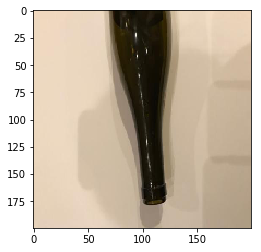

In [64]:
plt.imshow(X_train[500], cmap='gray')
plt.show()

In [65]:
y_train[708]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [67]:
model.fit(X_train, y_train, batch_size=64, nb_epoch=50, shuffle=True, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
2527/2527 [==============================] - 64s 26ms/step - loss: 1.6218 - acc: 0.3039
Epoch 2/50
2527/2527 [==============================] - 64s 26ms/step - loss: 1.6254 - acc: 0.3059
Epoch 3/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.6134 - acc: 0.3118
Epoch 4/50
2527/2527 [==============================] - 64s 26ms/step - loss: 1.5906 - acc: 0.3649
Epoch 5/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.5676 - acc: 0.3767
Epoch 6/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.5481 - acc: 0.3882
Epoch 7/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.5479 - acc: 0.3835
Epoch 8/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.5483 - acc: 0.3854
Epoch 9/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.5145 - acc: 0.3803
Epoch 10/50
2527/2527 [==============================] - 64s 25ms/step - loss: 1.4919 - acc: 0.4044
Epoch 11/

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [72]:
X_train.shape

(2021, 200, 200, 3)

In [75]:
X_test.shape[0]

506

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
checkpoint = ModelCheckpoint('gdrive/My Drive/garbage_weights/weights.{epoch:04d}-{val_acc:.2f}.hdf5',
                             monitor='val_acc', 
                             save_best_only=True )


logger = CSVLogger(os.path.join("gdrive/My Drive/garbage_weights", "training.csv"))

callbacks_list = [checkpoint, logger]

# model = DenseNet(input_shape=(img_rows,img_cols,img_channels), nb_classes=200, depth=20, growth_rate=32,
#                           dropout_rate=0.1, bottleneck=False, compression=0.5)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [80]:
model.fit(X_train, y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2021 samples, validate on 506 samples
Epoch 1/50
2021/2021 [==============================] - 71s 35ms/step - loss: 1.1733 - acc: 0.5532 - val_loss: 1.2007 - val_acc: 0.5514
Epoch 2/50
2021/2021 [==============================] - 56s 28ms/step - loss: 1.1612 - acc: 0.5725 - val_loss: 1.1818 - val_acc: 0.5692
Epoch 3/50
2021/2021 [==============================] - 56s 28ms/step - loss: 1.1231 - acc: 0.5735 - val_loss: 1.2116 - val_acc: 0.5573
Epoch 4/50
2021/2021 [==============================] - 56s 27ms/step - loss: 1.1441 - acc: 0.5730 - val_loss: 1.2298 - val_acc: 0.5415
Epoch 5/50
2021/2021 [==============================] - 56s 28ms/step - loss: 1.1246 - acc: 0.5720 - val_loss: 1.2732 - val_acc: 0.5474
Epoch 6/50
2021/2021 [==============================] - 55s 27ms/step - loss: 1.1600 - acc: 0.5730 - val_loss: 1.2625 - val_acc: 0.5375
Epoch 7/50
2021/2021 [==============================] - 56s 28ms/step - loss: 1.1381 - acc: 0.5557 - val_loss: 1.2883 - val_acc: 0.5178
E

In [81]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=50)

Epoch 1/50
32/31 [==============================] - 51s 2s/step - loss: 2.1347 - acc: 0.2808
Epoch 2/50
32/31 [==============================] - 51s 2s/step - loss: 1.6349 - acc: 0.3297
Epoch 3/50
32/31 [==============================] - 51s 2s/step - loss: 1.5619 - acc: 0.3604
Epoch 4/50
32/31 [==============================] - 51s 2s/step - loss: 1.5238 - acc: 0.3805
Epoch 5/50
32/31 [==============================] - 51s 2s/step - loss: 1.5023 - acc: 0.3744
Epoch 6/50
32/31 [==============================] - 51s 2s/step - loss: 1.4913 - acc: 0.4059
Epoch 7/50
32/31 [==============================] - 51s 2s/step - loss: 1.5133 - acc: 0.3946
Epoch 8/50
32/31 [==============================] - 51s 2s/step - loss: 1.4545 - acc: 0.4226
Epoch 9/50
32/31 [==============================] - 51s 2s/step - loss: 1.4521 - acc: 0.4240
Epoch 10/50
32/31 [==============================] - 51s 2s/step - loss: 1.4687 - acc: 0.4190
Epoch 11/50
32/31 [==============================] - 51s 2s/step - lo

In [1]:
model.save_weights('first_try.h5')  # always save your weights after training or during training

NameError: ignored

In [2]:
scores = model.evaluate(X_test, y_test, verbose=0)

NameError: ignored